In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_gaussian_quantiles

In [ ]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean = None,
                        n_samples = N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle = True,
                        random_state=None
                        )
X, Y = gaussian_quantiles

In [ ]:
#Add new column
Y = Y[:, np.newaxis]

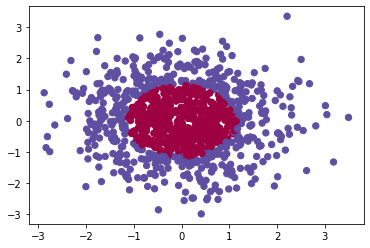

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

In [ ]:
#Activation Functions 
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:    
        return np.maximum(0, x)
#Loss function    
def mse(y, y_hat, derivate = False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

In [ ]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [ ]:
#structure of neural network
layer_dims = [2,4,8,1]
params = inizialize_parameters_deep(layer_dims)

In [ ]:
print(params['W1'].shape)
print(X.shape)

(2, 4)
(1000, 2)


In [ ]:
#Dot product
np.matmul(X, params['W1']).shape

(1000, 4)

In [ ]:
#Without function 
#A = Info 
#Z = Info post activation function 
#W = Weigth of parameters
#b = Bias

#ForwardPropagation 

#Entry point for values or data 
params['A0'] = X
#Dot product and sum bias 
params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
#Pass dot product to activation function in this case relu
params['A1'] = relu(params['Z1'])

params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
params['A3'] = sigmoid(params['Z3'])

output = params['A3']

##BackPropagation

#Use loss function for calculate accuracity 
#Use derivate cuz we need optimization or lower output 
params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
#Dot product from the last layer to layer-1
#This layers has a different shape so we need trasnpose 
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])


params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

## Gradient Descent 

params['W3'] = params['W3'] - params['dW3'] * 0.0001
params['b3'] = params['W3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * 0.0001


params['W2'] = params['W2'] - params['dW2'] * 0.0001
params['b2'] = params['W2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * 0.0001


params['W1'] = params['W1'] - params['dW1'] * 0.0001
params['b1'] = params['W1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * 0.0001

In [ ]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

In [ ]:
layer_dims =[2, 8, 8, 1]
params = inizialize_parameters_deep(layer_dims)
errors = []
for _ in range(60000):
    output = train(X,0.0001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))
    

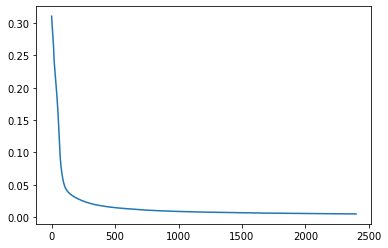

In [ ]:
plt.plot(errors)

In [ ]:
#test 
data_test = (np.random.rand(1000,2) * 2) -1
y = train(data_test, 0.0001, params, training= False)

In [ ]:
y  = np.where(y >= 0.5,1 , 0)

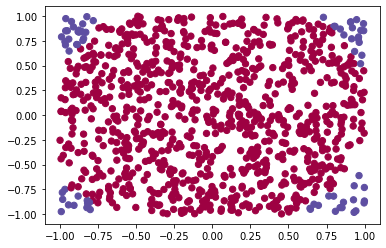

In [ ]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)